In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
from scipy import interpolate
import joblib

# Import data

Chargement des corrdonnées des oreilles 

In [10]:
model_ear = joblib.load('models/hmm_model_ear.pkl')
model_cow = joblib.load('models/hmm_model_cow.pkl')
model_head_snout = joblib.load('models/hmm_model_head_snout.pkl')

In [20]:

# Assuming model_ear and model_head_snout are the outputs of the two existing Gaussian HMMs
# Extract transition and emission probabilities from model_ear and model_head_snout
transition_matrix_combined = (model_cow.transmat_ + model_head_snout.transmat_) / 2  # Example: Averaging transition probabilities
print('transition matrix combined:\n', transition_matrix_combined)
print(len(transition_matrix_combined))
mean_combined = np.concatenate([model_cow.means_, model_head_snout.means_]) / 2  # Example: Averaging means
print('moyenne combined: \n',mean_combined)
covars_combined = np.concatenate([model_cow.covars_, model_head_snout.covars_]) / 2  # Example: Averaging covariances
print('Convariance combined :\n', covars_combined)
# Create the new HMM using the combined parameters
# Create the new HMM using the combined parameters
new_model = hmm.GaussianHMM(n_components=4, covariance_type='full')  # Example: Creating a new Gaussian HMM
new_model.startprob_ = np.array([1.0 / new_model.n_components] * new_model.n_components)  # Set startprob_ with equal probabilities
new_model.transmat_ = transition_matrix_combined
new_model.means_ = mean_combined
new_model.covars_ = covars_combined

# Use the new_model for further analysis or inference



transition matrix combined:
 [[9.91687252e-001 1.21050733e-208 7.13946609e-003 1.17328186e-003]
 [9.36857640e-004 9.97228249e-001 1.83489293e-003 0.00000000e+000]
 [2.18995826e-003 1.20626438e-003 9.92280631e-001 4.32314587e-003]
 [1.91319907e-003 0.00000000e+000 2.19196672e-003 9.95894834e-001]]
4
moyenne combined: 
 [[0.031532   0.03728335 0.40359986 0.65009966]
 [0.08736068 0.01968174 0.47029654 0.50959807]
 [0.13967834 0.04428898 0.31983488 0.69974297]
 [0.14795511 0.04216364 0.4241212  0.68332989]
 [0.11949985 0.2345656  0.20629455 0.33448944]
 [0.49369552 0.39229684 0.06571394 0.08381411]
 [0.12928415 0.24054733 0.08696574 0.11372177]
 [0.4080964  0.38889421 0.16363456 0.31062466]]
Convariance combined :
 [[[ 1.83755061e-03  1.11309253e-04 -1.97132216e-03 -1.17838944e-04]
  [ 1.11309253e-04  4.94786494e-04 -7.93029406e-04  1.34542009e-03]
  [-1.97132216e-03 -7.93029406e-04  3.78486266e-03 -1.90617676e-03]
  [-1.17838944e-04  1.34542009e-03 -1.90617676e-03  1.05072379e-02]]

 [[ 1

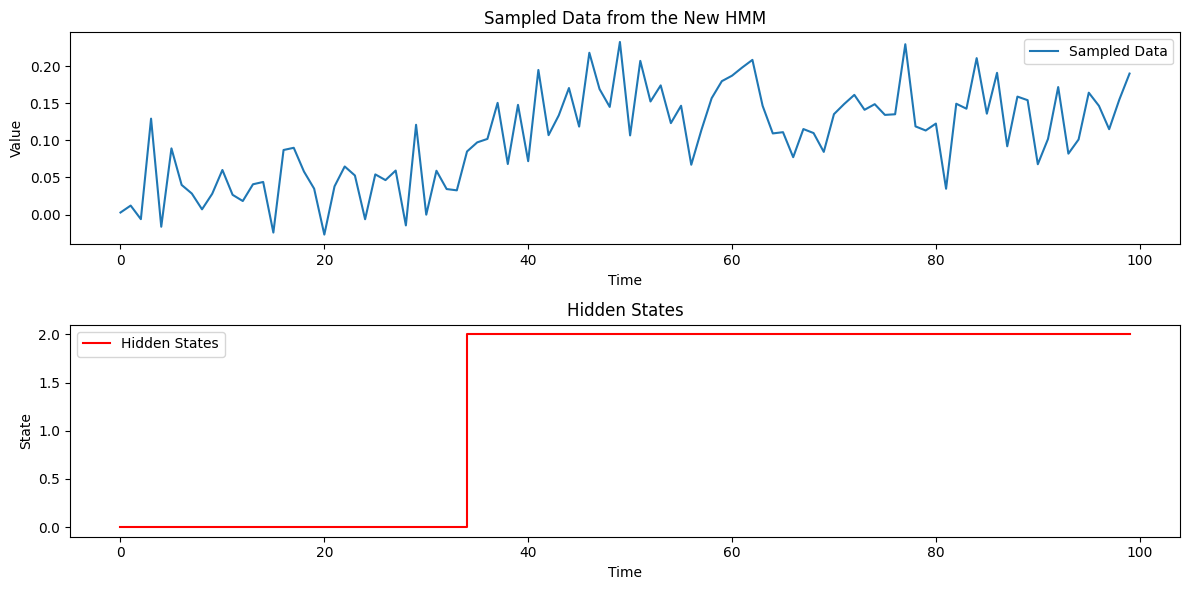

In [14]:
X, Z = new_model.sample(100)  # Generate 100 samples

# Plot the samples and the hidden states
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X[:, 0], label='Sampled Data')
plt.title('Sampled Data from the New HMM')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(Z, drawstyle="steps", label='Hidden States', color='r')
plt.title('Hidden States')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()

plt.tight_layout()
plt.show()

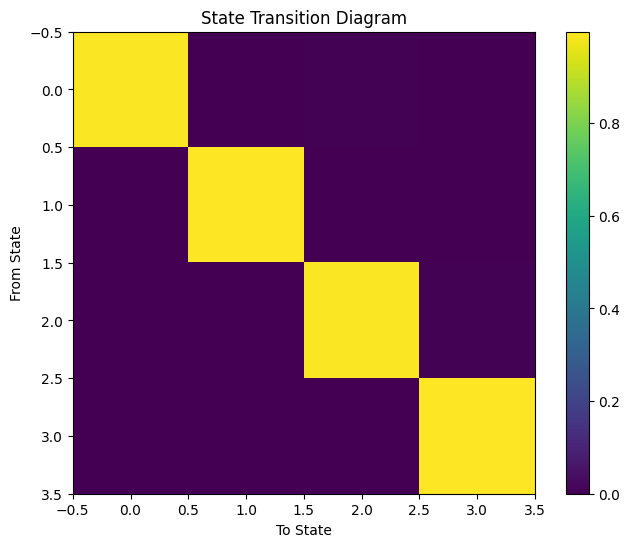

In [15]:
# Plot the state transition diagram
plt.figure(figsize=(8, 6))
plt.imshow(new_model.transmat_, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('State Transition Diagram')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

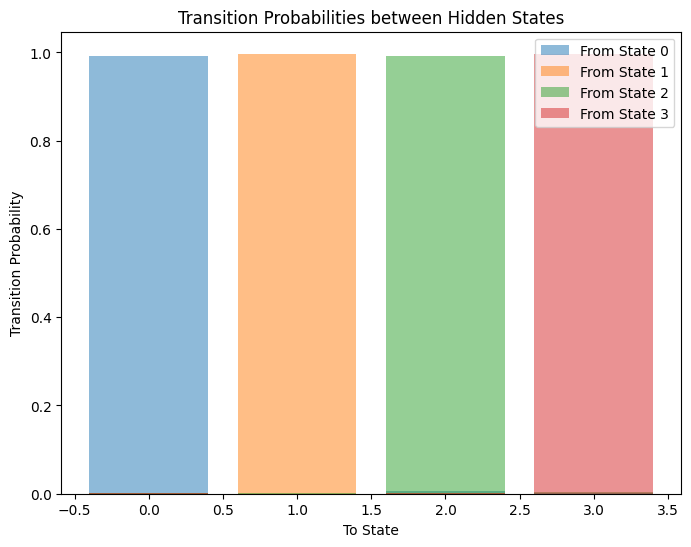

In [16]:
# Accessing the state transition matrix
transition_matrix = new_model.transmat_

# Plotting the transition probabilities as a bar chart
plt.figure(figsize=(8, 6))
states = np.arange(len(transition_matrix))
for i, state in enumerate(transition_matrix):
    plt.bar(states, state, alpha=0.5, label=f'From State {i}')
plt.xlabel('To State')
plt.ylabel('Transition Probability')
plt.title('Transition Probabilities between Hidden States')
plt.legend()
plt.show()

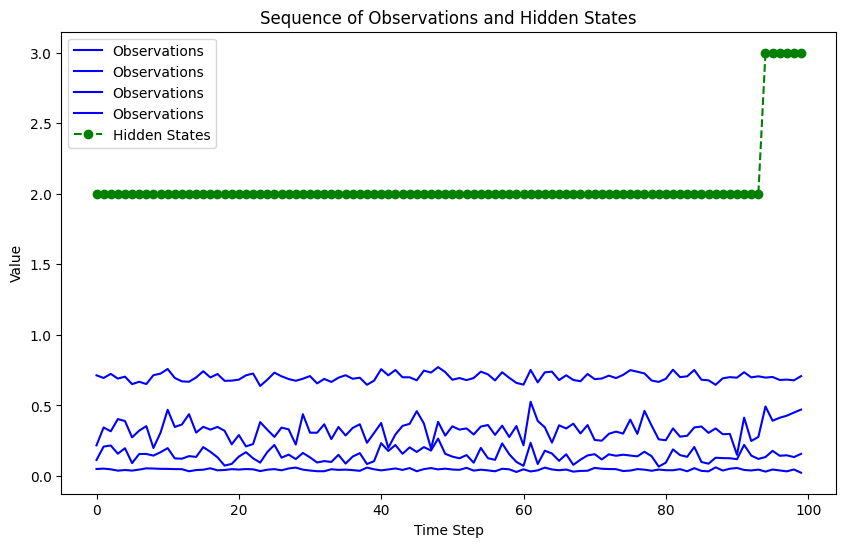

In [17]:
# Simulating a sequence of observations and corresponding hidden states
num_obs = 13  # Number of observations
obs, states = new_model.sample(num_obs)

# Plotting the sequence of observations and corresponding hidden states
plt.figure(figsize=(10, 6))
plt.plot(obs, label='Observations', color='blue')
plt.plot(states, label='Hidden States', linestyle='--', marker='o', color='green')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Sequence of Observations and Hidden States')
plt.legend()
plt.show()